# MNIST
First we need to get the dataset. Scikit-Learn provides many helper functions to download popular datasets. MNIST is one of them. The following code fetches the MNIST dataset.

In [46]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True)

In [47]:
X, y = mnist["data"], mnist["target"]
X.shape
#y.shape

(70000, 784)

There are 70,000 images, and each image has 784 features. This is because each image
is 28×28 pixels, and each feature simply represents one pixel’s intensity, from 0
(white) to 255 (black). Let us plot one of the images to see how it is like.

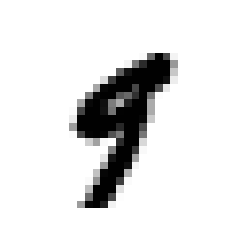

'9'

In [48]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,interpolation="nearest")
plt.axis("off")
plt.show()
y[36000]

We can see that this is the picture of a digit 9, and the label also tells us so. Next we need to split the data set in to training and test set, actully this is already done. The **MNIST** dataset is actually already split into a training set (the first 60,000 images) and a test set (the last 10,000 images).

In [49]:
import numpy as np
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

After spliting the data we have also suffled the data so that the digits are evenly distributed and we have no problem while performing cross validation.

In [79]:
from sklearn.linear_model import SGDClassifier

y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')
#y_train_5= y_train_5.astype(int) 

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)
sgd_clf.predict([some_digit])

array([False])

In [81]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.96735, 0.95845, 0.9646 ])

In [80]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train_5[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train_5[test_index])

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

/home/zenith/environments/anaconda3/envs/tf-testbed/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


0.96735
0.95845
0.9646


In [82]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.96735, 0.95845, 0.9646 ])

The accuracy of classifier seems to be around $95\%$. But here is the catch, only about $10\%$ of the images are actully 5s. So even if the classifier just guessed `False` al the time it would have an accuracy of $90\%$. This is why accuracy is not a measure of the performance of a Classifier, specially on skewed datasets where one of the labels is much more frequent than others.